# Tarea 2 - Rodrigo Vílchez B78292
### Descripción
El presente dataset, obtenido de *Kaggle*, posee datos de pacientes que han sido internados en diferentes hospitales de Estados Unidos. Cuenta con mucha información de cada paciente: edad, altura, datos biométricos, condiciones de salud, factores de riegso, etc. Además, cuenta con una variable que indica si el paciente falleció en el hospital o no, esta variable será la utilizada para hacer un modelo de clasificación binaria con base en las variables mencionadas. El dataset posee alrededor de 91,000 registros antes del proceso de limpieza de datos.

### Preprocesamiento y Limpieza de Datos
Se eliminó las columnas correspondientes a *encounter_id* y *patient_id* pues son valores únicos por pacientes que son más cuestiones logísticas y adminsitrativas de la estadía del paciente en un hospital. Se eliminó variables que hacen referencia a la unidad UCI. Se eliminó los registros que tuvieran vacías las variables para *age*, *height*, *ethnicity* *weight* pues no se pueden deducir o calcular con la información existente. El resto de variables poseen información directa de la condición del paciente y no se eliminaron aunque algunas estén en blanco, pues a este punto no se sabe si el resto de las variables ofrecen la información suficiente para realizar una predicción. Se cambió a valor numéricos las variables referentes a *age*, *height* y *weight*. Se eliminó aquellas variables que no pudieran ser convertidas a un valor numérico (texto), excepto el género: para masculino se utiliza 1 y para femenino 0, esto porque algunas técnicas para realizar *feature selection* necesitan que las variables sean del mismo tipo y que no hayan variables en blanco, razón por la que se eliminó los registros que no tuvieran la información completa. Se verificó la existencia de duplicados y se eliminaron columnas que estaban en blanco. Después de estas operaciones, el dataset quedó con 57,200 registros. 

### Análisis Exploratorio de Datos
Cargar los datos utilizando la librería *pandas* y visualizar los datos con ayuda de *ggplot*.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

dataset = 'https://raw.githubusercontent.com/rigovil/ci0163/main/tareas/tarea_2/dataset.csv'
pacientes = pd.read_csv(dataset, sep=',', index_col=0)

Descripción general estadísticas de las variables presentes en el dataset.

In [6]:
pacientes.describe()

,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,...,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000,57596.000000
mean,62.578808,29.283016,0.159855,0.544204,169.803586,0.821801,84.437696,181.988819,546.649862,0.182409,...,0.061379,0.001007,0.017449,0.234113,0.014758,0.029099,0.007830,0.004219,0.022154,0.085805
std,16.640421,8.318203,0.366475,0.498046,10.765768,2.414588,25.109054,85.643918,450.469560,0.386184,...,0.186695,0.031718,0.130939,0.423447,0.120584,0.168086,0.088143,0.064818,0.147187,0.280078
min,16.000000,14.844926,0.000000,0.000000,137.200000,-0.244444,38.600000,101.000000,101.010000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,23.693328,0.000000,0.000000,162.600000,0.036111,67.100000,113.000000,204.010000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.759325,0.000000,1.000000,170.100000,0.138889,80.800000,122.000000,409.020000,0.000000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,33.057851,0.000000,1.000000,177.800000,0.388889,97.500000,301.000000,703.030000,0.000000,...,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,1.000000,195.590000,73.022917,186.000000,308.000000,2201.050000,1.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Distribución por BMI**

Text(0.5, 1.0, 'Distribución del BMI (IMC)')

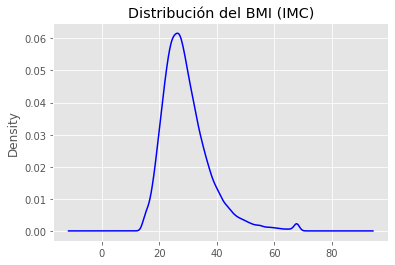

In [7]:
pacientes['bmi'].plot(kind='kde', color='blue')
plt.title('Distribución del BMI (IMC)')

Se ve como la distribución del índice de masa corporal se encuentra entre ~20 y ~40 con posibilidad que existan *outliers*.

##### **Distribución por Edad**

Text(0.5, 1.0, 'Distribución por edad')

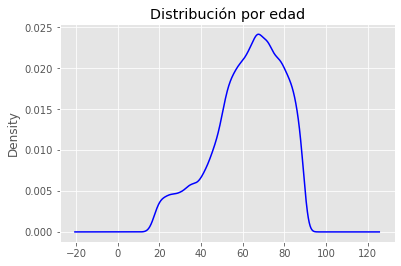

In [8]:
pacientes['age'].plot(kind='kde', color='blue')
plt.title('Distribución por edad')

##### **Distribución por Peso (KG)**

Text(0.5, 1.0, 'Distribución por peso')

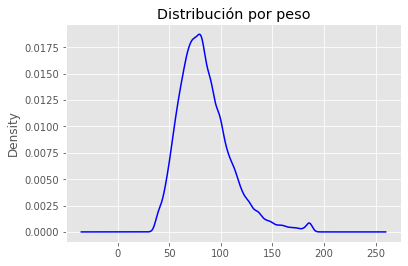

In [9]:
pacientes['weight'].plot(kind='kde', color='blue')
plt.title('Distribución por peso')

Se ve como existen datos que se salen de la media en cuanto al peso, el *pico* que se observa en el gráfico de BMI es explicado por los registros de pacientes cuyo peso es muy alto, ya que el peso influye proporcionalmente en el BMI.

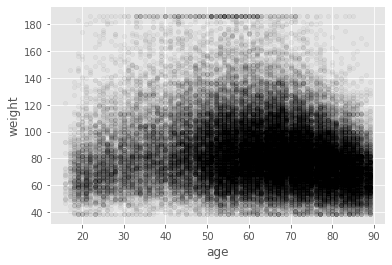

In [10]:
pacientes.plot(x='age', y='weight', kind = 'scatter', color = 'black', alpha = 0.04)

El gráfico anterior muestra la relación que existe entre la edad y el peso de los pacientes. Es claro que la mayoría de pacientes oscila en un peso menor a 140 kg, pero no es posible determinar una correlación con base en el gráfico pues la enorme cantidad de datos puede opacar el análisis.

gender
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

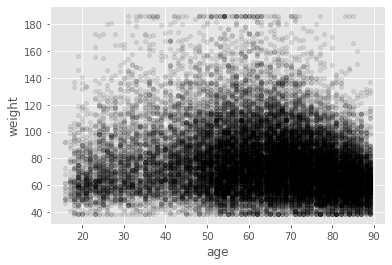

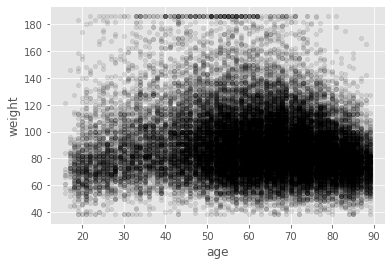

In [11]:
pacientes.groupby('gender').plot(x='age', y='weight', kind = 'scatter', color = 'black', alpha = 0.1)

Los dos gráficos anteriores muestran la misma relación edad-peso dividido por género, ambos parecen ser muy similares por lo que no debería haber una diferencia sustancial entre un género y otro.

### Selección de Atributos 

##### **Feature Importance**
Se construye un *ExtraTreeClassifier* para evaluar la importancia de las variables y su influencia en la variable que se quiere predecir *hospital_death*.

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

array = pacientes.values
X = array[:,0:73]
Y = array[:,73]
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X,Y)

i = 0
columnas = list(pacientes.keys())
diccionario = {}
for variable in model.feature_importances_:
  diccionario[columnas[i]] = variable
  i+=1

diccionario = sorted(diccionario.items(), key=lambda x: x[1], reverse=True)
for valor in diccionario:
  print(valor)


('apache_4a_icu_death_prob', 0.052121228903832584)
('apache_4a_hospital_death_prob', 0.050741377616143356)
('gcs_eyes_apache', 0.024518813350392986)
('d1_spo2_min', 0.023662794295417084)
('d1_sysbp_noninvasive_min', 0.022704160166520257)
('ventilated_apache', 0.021539378100183325)
('temp_apache', 0.02106558713192044)
('d1_temp_min', 0.019872432969665645)
('d1_heartrate_min', 0.019006404869076447)
('d1_sysbp_min', 0.018212350022299022)
('pre_icu_los_days', 0.016886705438059334)
('gcs_motor_apache', 0.01679848278896809)
('d1_temp_max', 0.016731446169697375)
('age', 0.016508355289839877)
('d1_mbp_noninvasive_min', 0.016449554296145176)
('d1_diasbp_min', 0.01599349231813415)
('d1_mbp_min', 0.01560345571968389)
('d1_resprate_min', 0.015561047918053383)
('d1_heartrate_max', 0.015470401029125261)
('d1_diasbp_noninvasive_min', 0.015269200759949128)
('apache_3j_diagnosis', 0.01491113132836055)
('d1_potassium_max', 0.014819929601069638)
('d1_glucose_min', 0.014698097215484702)
('h1_spo2_min', 0.

##### **Univariate Selection**
Se busca recursivamente cuál conjunto de atributos funciona mejor al momento de predecir la variable de respuesta, eliminando y construyendo modelos con los atributos restantes. (ignorar el warning)

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

array = pacientes.values
X = array[:,0:73]
Y = array[:,73]
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, Y)

i = 0
columnas = list(pacientes.keys())
diccionario = {}
for variable in fit.scores_:
  diccionario[columnas[i]] = variable
  i+=1

diccionario = sorted(diccionario.items(), key=lambda x: x[1], reverse=True)
for valor in diccionario:
  print(valor)

('apache_4a_hospital_death_prob', 8445.857917802268)
('apache_4a_icu_death_prob', 7422.959460549616)
('gcs_motor_apache', 4648.9117615400155)
('gcs_eyes_apache', 3866.4765697246307)
('gcs_unable_apache', nan)
('gcs_verbal_apache', 3376.383798397771)
('ventilated_apache', 3176.2486319220534)
('d1_spo2_min', 2534.037922341988)
('d1_temp_min', 2519.823872391064)
('d1_sysbp_min', 2490.250203856783)
('d1_sysbp_noninvasive_min', 2484.374587202463)
('d1_mbp_min', 2187.4619694054854)
('d1_mbp_noninvasive_min', 2178.103937201044)
('intubated_apache', 2170.0938036126836)
('d1_diasbp_min', 1840.8062561729826)
('d1_diasbp_noninvasive_min', 1835.7792312449067)
('d1_heartrate_max', 1547.674710036747)
('temp_apache', 1406.0727639872207)
('h1_sysbp_min', 1065.966738459337)
('h1_sysbp_noninvasive_min', 1058.2485270902507)
('h1_mbp_noninvasive_min', 1050.315725222524)
('h1_mbp_min', 1045.2707272415614)
('h1_diasbp_noninvasive_min', 860.8962750484338)
('h1_diasbp_min', 855.7600856038695)
('h1_resprate_ma

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Con las dos técnicas anteriores, se puede evaluar la importancia de cada *feature* dentro del dataset, y que permiten elegir aquellos que mayor influencia tengan en la variable de respuesta. Arbitrariamente se elige tener solamente 9 de los 73 *features* presentes en el dataset. Con base en esto, se eligen las siguientes variables:



1. *apache_4a_hospital_death_prob*
2. *apache_4a_icu_death_prob*
3. *gcs_eyes_apache*
4. *d1_spo2_min*
5. *gcs_verbal_apache*
6. *d1_temp_min*
7. *d1_mbp_noninvasive_min*
8. *d1_sysbp_min*
9. *d1_heartrate_max*

Las cuales corresponden respectivamente:

1. Predicción probabilística de muerte del paciente.
2. Predicción probabilística de muerte en una unidad UCI del paciente.
3. Escala de coma de Glasgow (eyes) medido durante las primeras 24 horas.
4. Saturación de oxígeno mínima del paciente registrada.
5. Escala de coma de Glasgow (verbal) medido durante las primeras 24 horas.
6. Temperatura corporal mínima del paciente registrada.
7. Promedio más bajo de presión arterial del paciente.
8. Presión arterial sistólica más baja del paciente.
9. Frecuencia cardíaca más alta del paciente.

El dataset se modifica para que contenga solamente estas columnas. (*dataset_2.csv*)

### Algoritmos de Aprendizaje

In [25]:
dataset = 'https://raw.githubusercontent.com/rigovil/ci0163/main/tareas/tarea_2/dataset_entrenamiento.csv'
pacientes_entrenamiento = pd.read_csv(dataset, sep=',')
array = pacientes_entrenamiento.values

[3.00e+00 4.00e+00 1.19e+02 4.60e+01 7.40e+01 7.30e+01 3.72e+01 1.00e-01
 5.00e-02 0.00e+00]


**Random Forest**

Se construye un modelo de bosque aleatorio.

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std

array = pacientes_entrenamiento.values
X = array[:,0:9]
Y = array[:,9]

model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Precision: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Precision: 0.921 (0.004)


Se observa como el modelo obtiene una precisión del 92% con los datos de entrenamiento. Hace falta entrenar el modelo con esos datos y utilizar el dataset de prueba para evaluar las métricas de desempeño.

In [16]:
model.fit(X, Y)

RandomForestClassifier()

Se lee el dataset para datos de testing.

In [27]:
dataset = 'https://raw.githubusercontent.com/rigovil/ci0163/main/tareas/tarea_2/dataset_prueba.csv'
pacientes_prueba = pd.read_csv(dataset, sep=',')

Una vez entrenado el modelo, se realiza la predicción para dato de prueba y se cuentan tanto los aciertos como los fallos.

In [29]:
array_pruebas = pacientes_prueba.values
aciertos = 0
fallos = 0

for dato in array_pruebas:
  array = []
  dato_float = [float(i) for i in dato]
  array.append(list(dato[0:9]))
  yhat = model.predict(array)

  if(int(dato[9]) == int(yhat[0])):
    aciertos+=1
  else:
    fallos+=1

total = aciertos + fallos
print('Porcentaje de aciertos: %.3f' % (aciertos*100/total))


Porcentaje de aciertos: 92.635


**Extra Trees**

Se construye el modelo.

In [30]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier

array = pacientes_entrenamiento.values
X = array[:,0:9]
Y = array[:,9]

model = ExtraTreesClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Precisión: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Precisión: 0.921 (0.003)


El algoritmo da como resultado una precisión del 92%. Se procede a entrenar el modelo con estos datos y probarlo con el conjunto de datos de prueba.

In [31]:
model.fit(X,Y)

ExtraTreesClassifier()

Se realizan predicciones con el mismo dataset de prueba utilizado para bosque aleatorio.

In [32]:
array_pruebas = pacientes_prueba.values
aciertos = 0
fallos = 0

for dato in array_pruebas:
  array = []
  dato_float = [float(i) for i in dato]
  array.append(list(dato[0:9]))
  yhat = model.predict(array)

  if(int(dato[9]) == int(yhat[0])):
    aciertos+=1
  else:
    fallos+=1

total = aciertos + fallos
print('Porcentaje de aciertos: %.3f' % (aciertos*100/total))

Porcentaje de aciertos: 92.534


**Resultados**

Ambos algoritmos arrojaron un porcentaje de precisión y varianza similar cuando, inicialmente, se probó con el conjunto de datos de entrenamiento. Una vez que los modelos fueron entrenados y se evaluaron con los datos de prueba, ambos modelos arrojaron resultado de aciertos muy similares ~92%, los cuales se asemejan a la primera prueba pre-entrenamiento. Aún así, por un margen muy pequeño, el algoritmo de bosque aleatorio tuvo mejor desempeño en cuanto aciertos/fallos en comparación con el algoritmo de *Extra Trees*

### Variables de importancia

Dos de las variables de mayor importancia para haber construido los modelos de predicción son la de *predicción probabilística de muerte del paciente* y *predicción probabilística de muerte en una unidad UCI del paciente.* Ya que, tal como lo indican sus nombres, la naturaleza del atributo nace de una probabilidad previamente calculada por equipo de los hospitales que atendieron a los pacientes, por tanto es normal que desde la etapa de *feature selection* hayan destacado como las de mayor relevancia al momento de predecir la variable de respuesta. La tercera variable en importancia es *d1_spo2_min*, que corresponde a la saturación de oxígeno mínima registrada por el paciente. En la fase de *feature selection* también arrojó valores altos en cuanto a su posible relevancia para los modelos y se puede considerar 'usual', pues el indicador de oxígeno en sangre está altamente relacionado con la capacidad de supervivencia de pacientes críticos.